In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

In [17]:
import warnings
import os
warnings.filterwarnings('ignore')

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer


In [19]:
df = pd.read_csv('../../EDA/data/concrete_data.csv')

In [20]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [21]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [22]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [23]:
X = df.drop(columns=['Strength'], axis=1)
y = df['Strength']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape, X_test.shape

((824, 8), (206, 8))

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)


0.6275531792314848

In [27]:
lr = LinearRegression()
cross_val_score(lr, X, y, scoring='r2', cv=5).mean()

np.float64(0.46099404916628683)

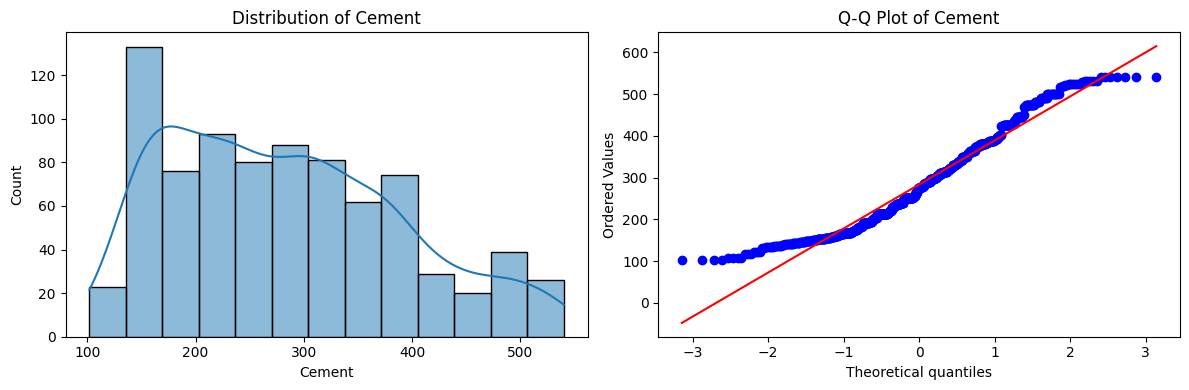

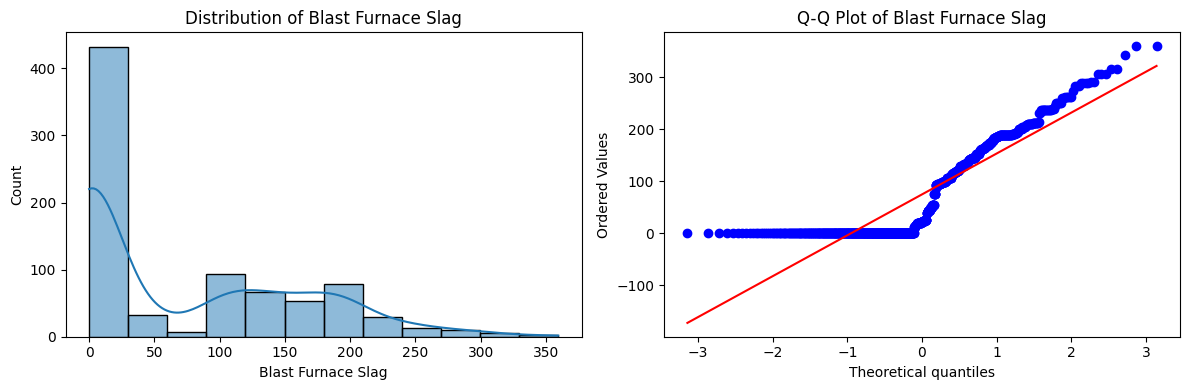

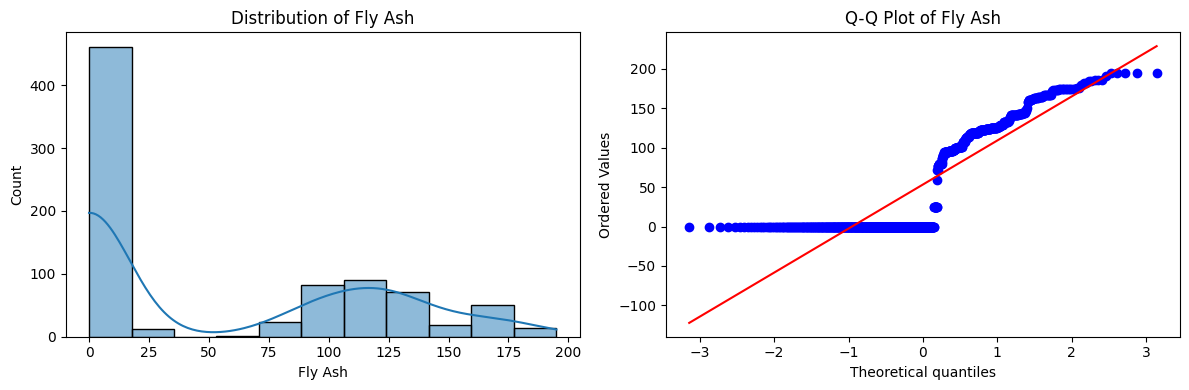

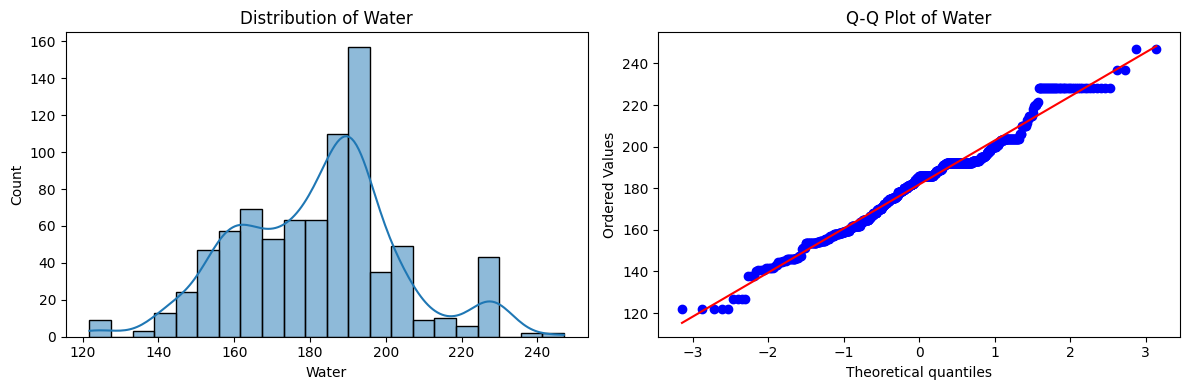

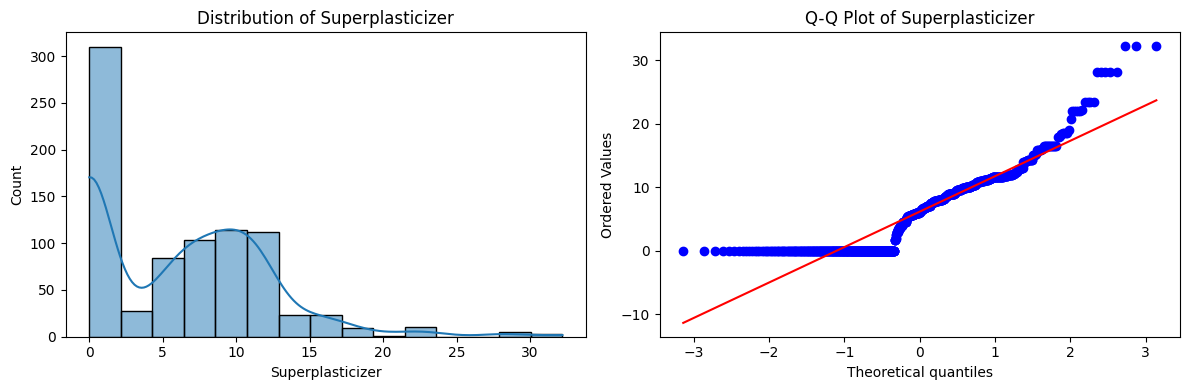

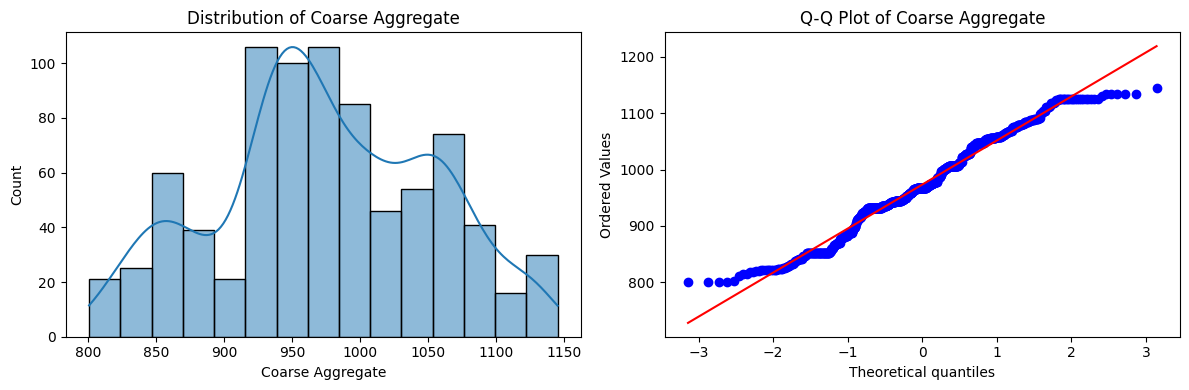

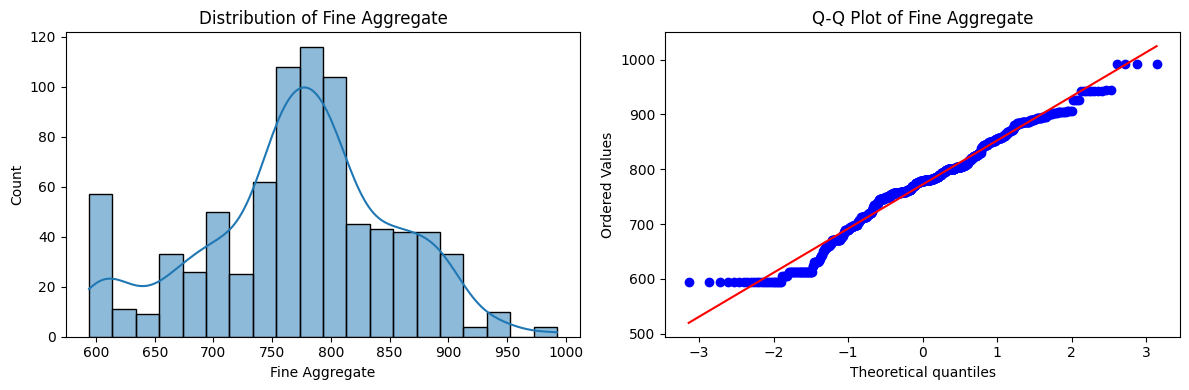

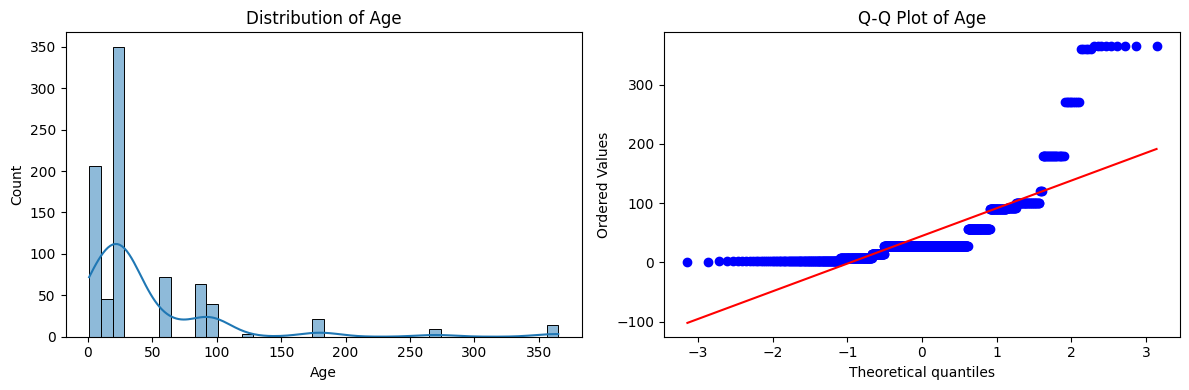

In [32]:
for col in X_train.columns:
    fig = plt.figure(figsize=(12, 4))

    ax1 = fig.add_subplot(1, 2, 1)
    sns.histplot(X_train[col], ax=ax1, kde=True)
    ax1.set_title(f'Distribution of {col}')

    ax2 = fig.add_subplot(1, 2, 2)
    stats.probplot(X_train[col], dist='norm', plot=ax2)
    ax2.set_title(f'Q-Q Plot of {col}')

    plt.tight_layout()
    plt.show()

In [ ]:
pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)



pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [36]:
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

y_pred2 = lr.predict(X_test_transformed)
r2_score(y_test, y_pred2)


0.8047825008078887

In [38]:
lr = LinearRegression()
X_transformed = pt.fit_transform(X+0.000001)
cross_val_score(lr, X_transformed, y, cv=5, scoring='r2').mean()

np.float64(0.6662950326831087)

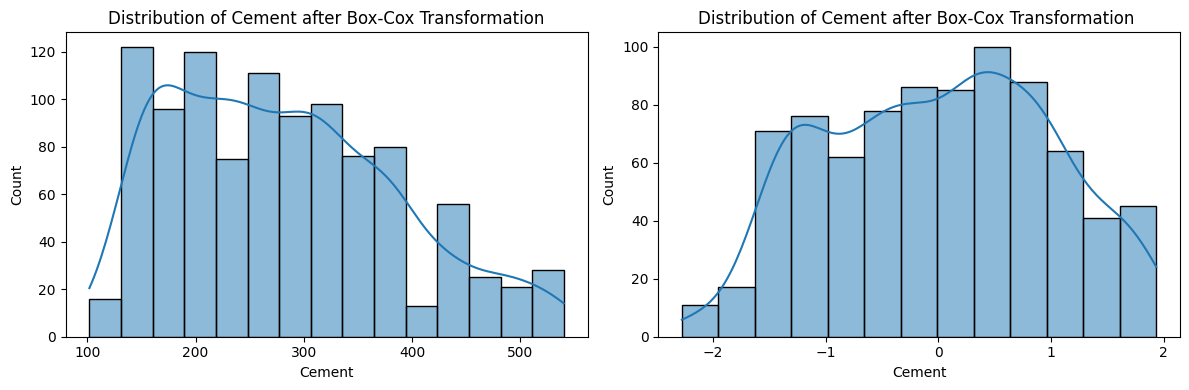

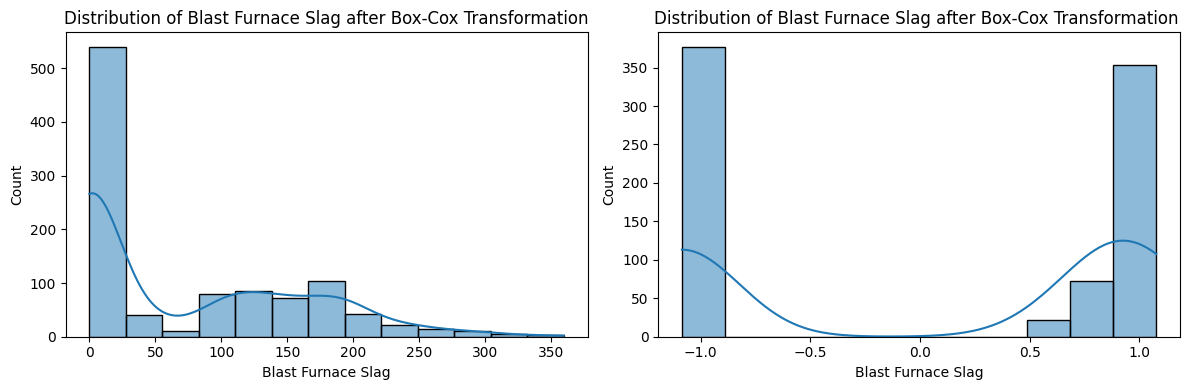

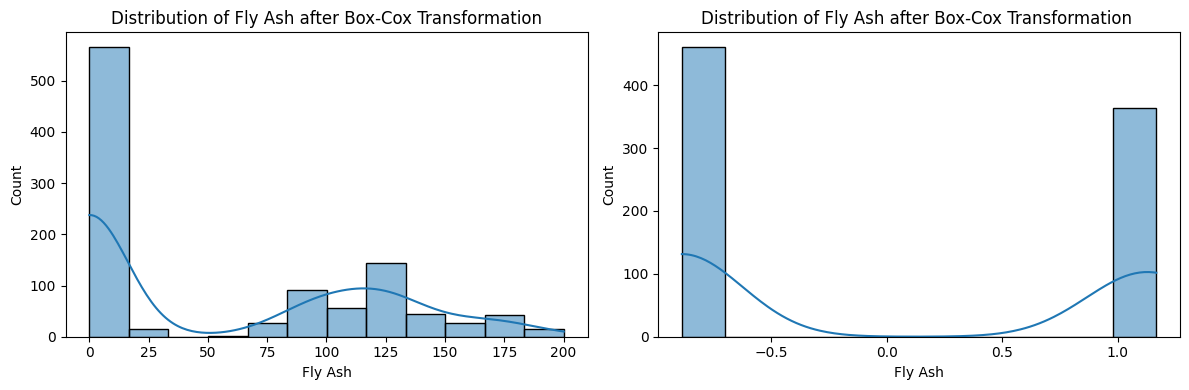

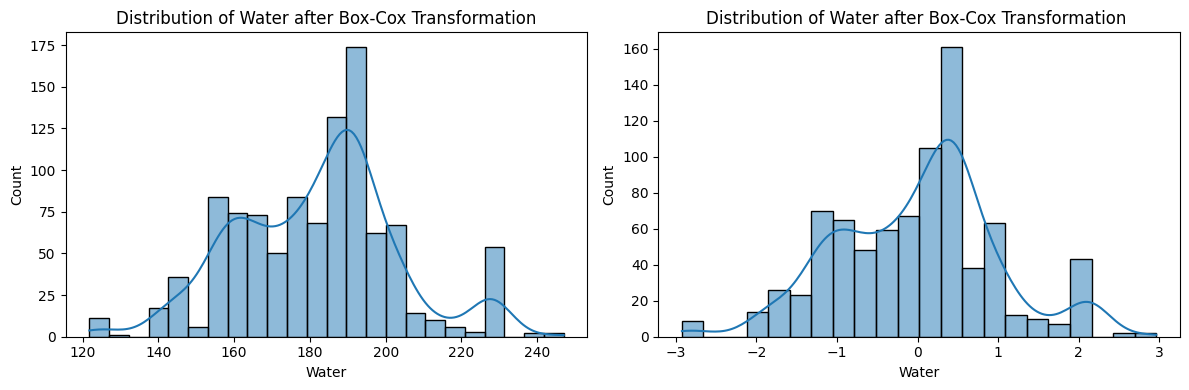

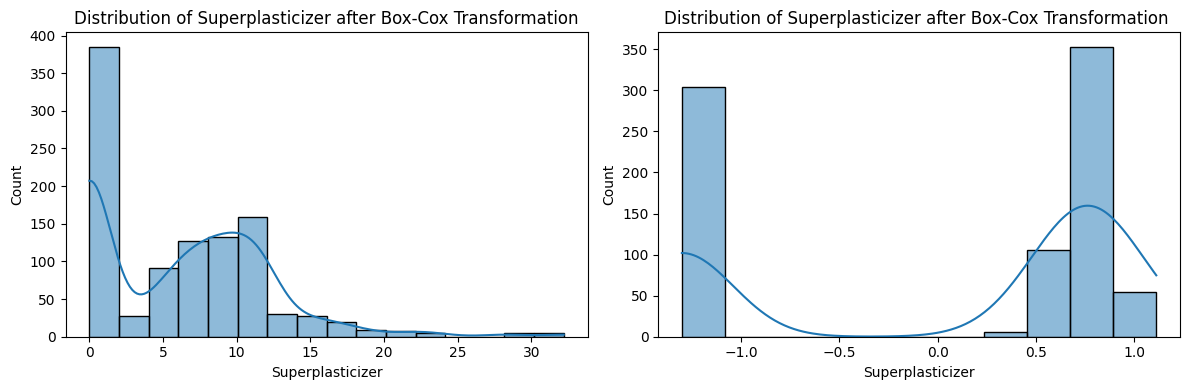

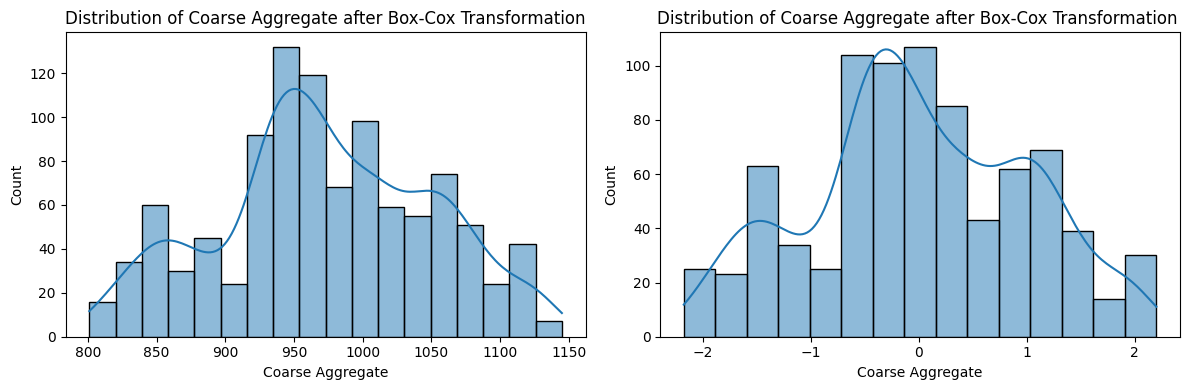

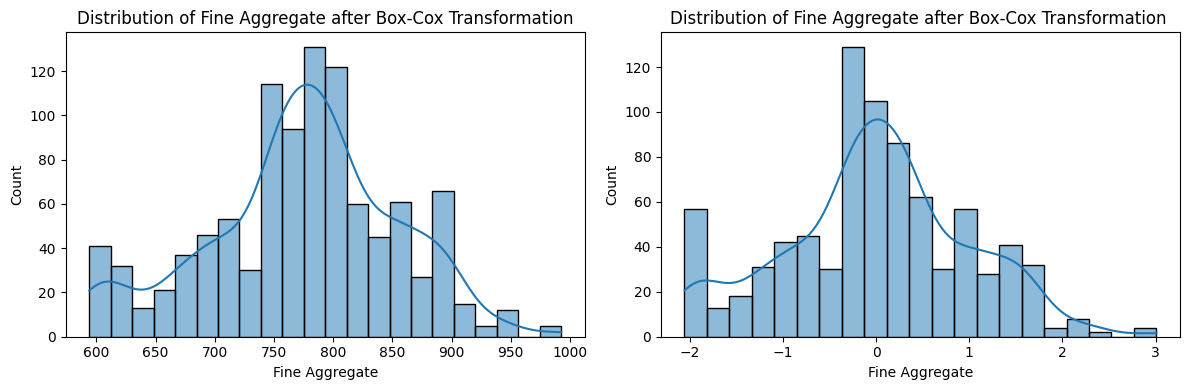

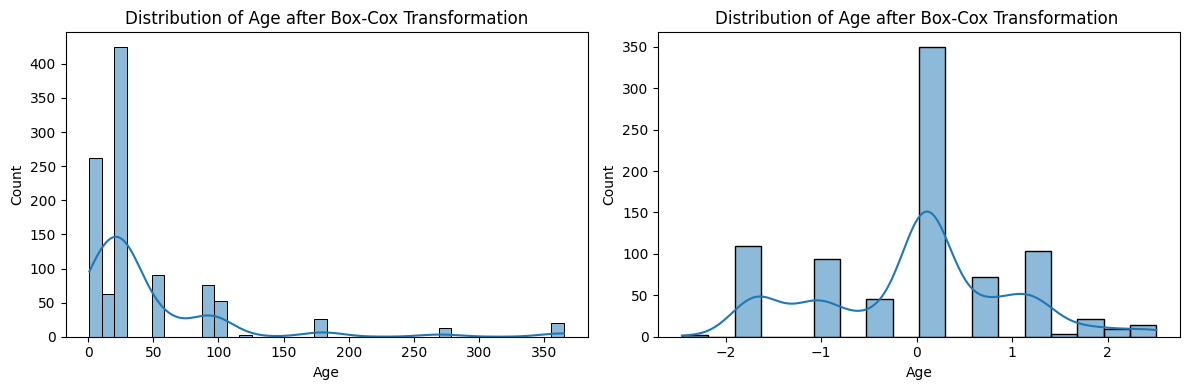

In [50]:
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train.columns)
for col in X_train_transformed_df.columns:
    fig = plt.figure(figsize=(12, 4))
    ax1 = fig.add_subplot(1, 2, 1)
    sns.histplot(X[col], ax=ax1, kde=True)
    ax1.set_title(f'Distribution of {col} after Box-Cox Transformation')

    ax2 = fig.add_subplot(1, 2, 2)
    sns.histplot(X_train_transformed_df[col], ax=ax2, kde=True)
    ax2.set_title(f'Distribution of {col} after Box-Cox Transformation ')
    plt.tight_layout()
    plt.show()

In [44]:
pt1 = PowerTransformer(method='yeo-johnson')
X_train_transformed_yeo = pt1.fit_transform(X_train)
X_test_transformed_yeo = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed_yeo, y_train)
y_pred_yeo = lr.predict(X_test_transformed_yeo)
print(r2_score(y_test, y_pred_yeo))
pd.DataFrame({'cols':X_train.columns,'yeo_johnson_lambdas':pt1.lambdas_})

0.8161906511066099


,cols,yeo_johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [45]:
pt = PowerTransformer(method='yeo-johnson')
X_transformed_yeo = pt.fit_transform(X)
cross_val_score(lr, X_transformed_yeo, y, cv=5, scoring='r2').mean()

np.float64(0.6834625126992434)

In [47]:
X_transformed_yeo_df = pd.DataFrame(X_transformed_yeo, columns=X.columns)
X_transformed_yeo_df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,1.994342,-1.057530,-0.902763,-0.914487,-0.327700,0.862160,-1.208485,0.111732
1,1.994342,-1.057530,-0.902763,-0.914487,-0.327700,1.057114,-1.208485,0.111732
2,0.607415,1.001476,-0.902763,2.136453,-1.225815,-0.530500,-2.085749,2.129725
3,0.607415,1.001476,-0.902763,2.136453,-1.225815,-0.530500,-2.085749,2.401692
4,-0.744998,0.969970,-0.902763,0.496978,-1.225815,0.065405,0.629012,2.389241


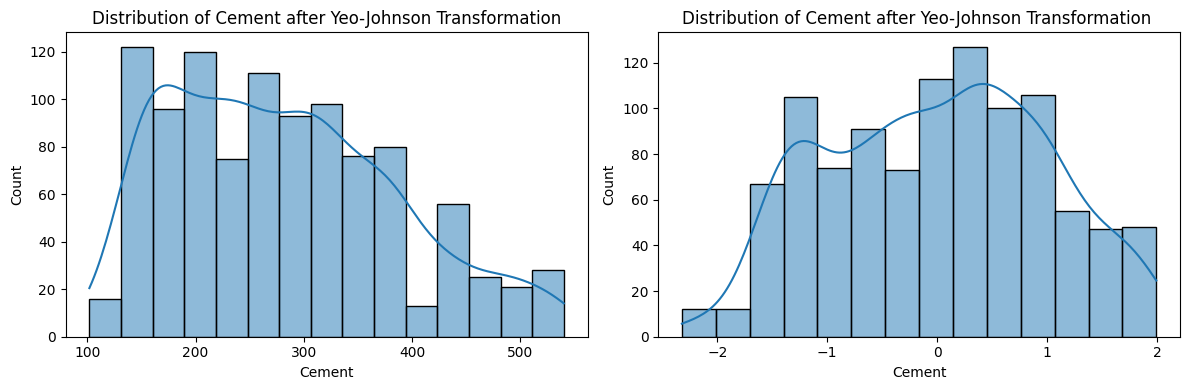

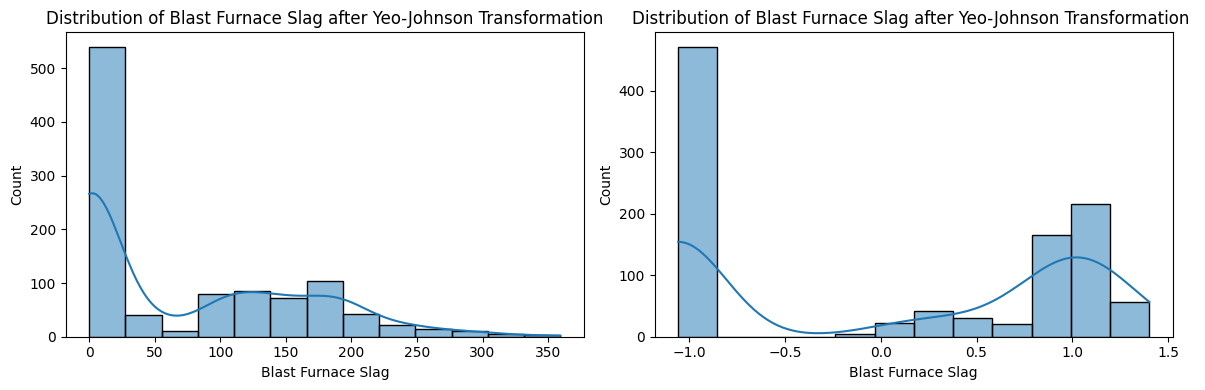

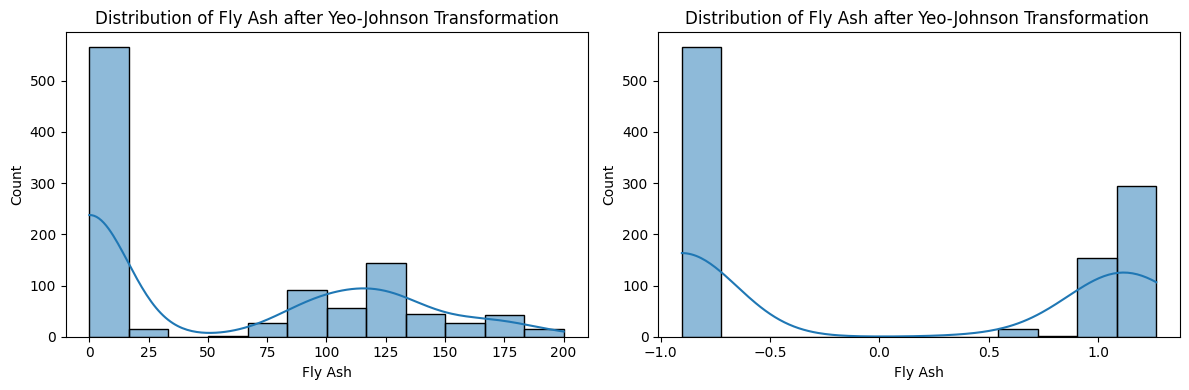

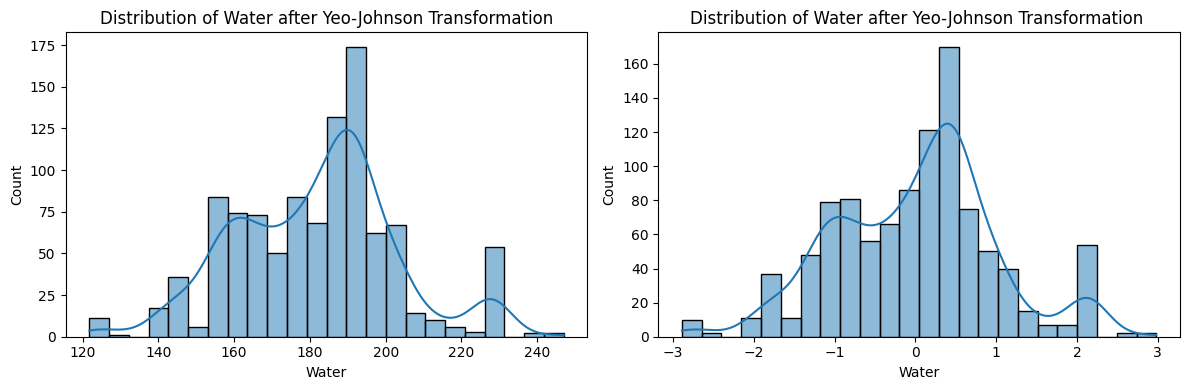

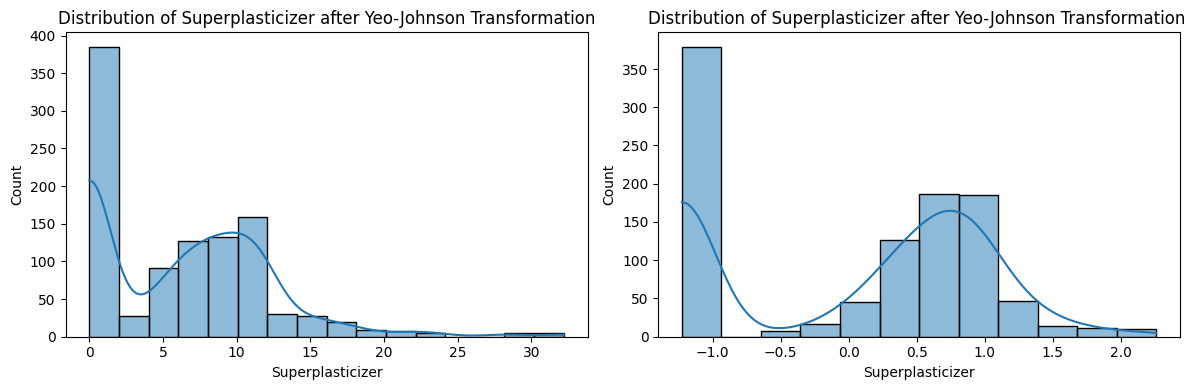

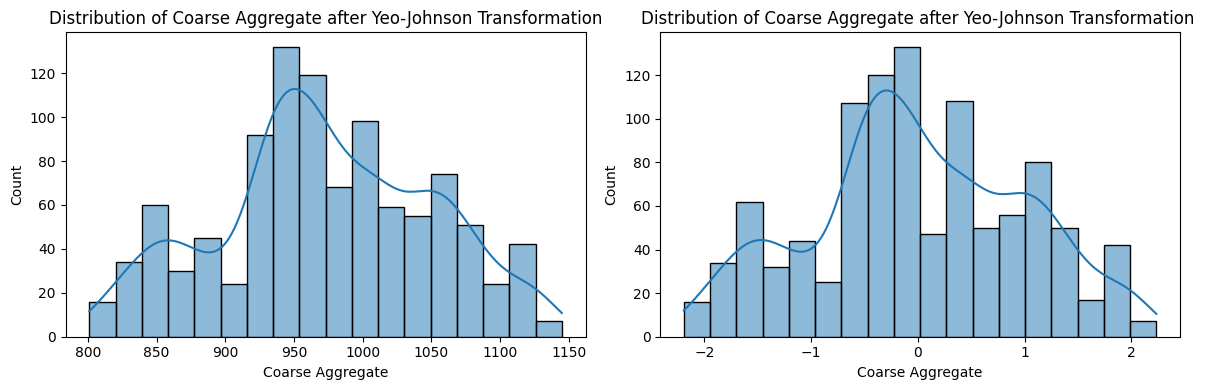

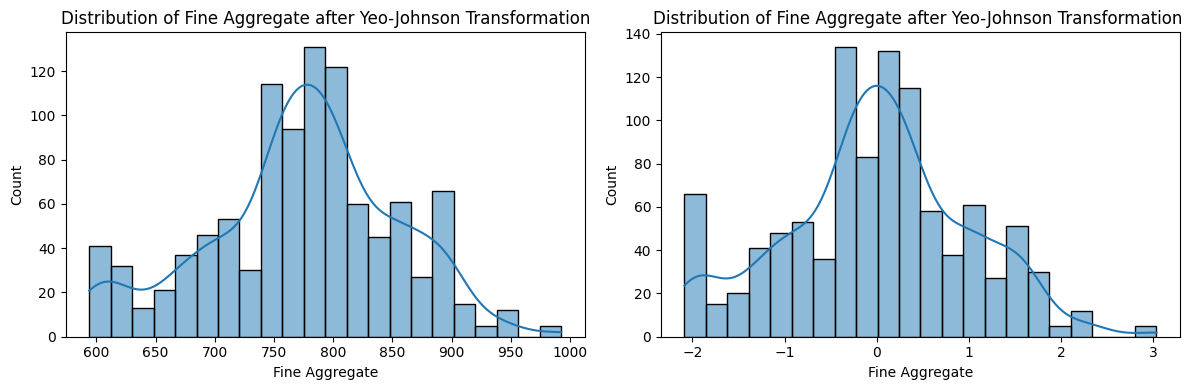

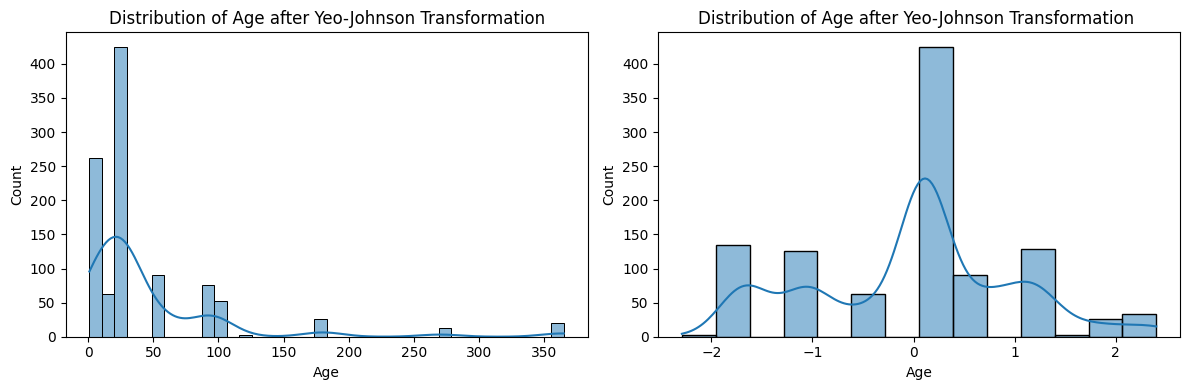

In [49]:
for col in X_transformed_yeo_df.columns:
    fig = plt.figure(figsize=(12, 4))
    ax1 = fig.add_subplot(1, 2, 1)
    sns.histplot(X[col], ax=ax1, kde=True)
    ax1.set_title(f'Distribution of {col} after Yeo-Johnson Transformation')

    ax2 = fig.add_subplot(1, 2, 2)
    sns.histplot(X_transformed_yeo_df[col], ax=ax2, kde=True)
    ax2.set_title(f'Distribution of {col} after Yeo-Johnson Transformation ')
    plt.tight_layout()
    plt.show()